Import Library

In [1]:
import os
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Create Directory, Show Number of Images

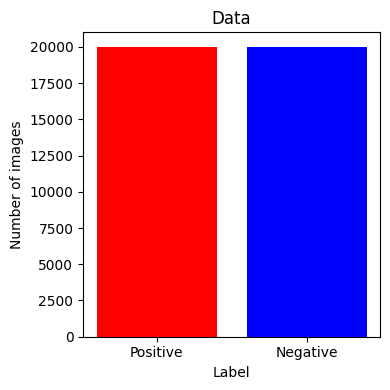

In [39]:
positive_dir = "D:/CS231.O22/data/Positive" # Đường dẫn tới thư mục Positive
negative_dir = "D:/CS231.O22/data/Negative" 

numOf_Positive_Img = len(os.listdir(positive_dir)) # Số lượng hình trong thư mục Positive
numOf_Negative_Img = len(os.listdir(negative_dir))

# Tạo biểu đồ cột
plt.figure(figsize=(4, 4))  # Chỉnh kích thước biểu đồ
plt.bar(["Positive", "Negative"], [numOf_Positive_Img, numOf_Negative_Img], color=['red', 'blue'])  # Chọn màu cho các cột
plt.xlabel("Label")  # Đặt tên cho trục X
plt.ylabel("Number of images")  # Đặt tên cho trục Y
plt.title("Data")  # Đặt tiêu đề cho biểu đồ
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các thành phần
plt.show()

Show data

In [40]:
def show_data(directory):

    fig, axes = plt.subplots(5, 5, figsize=(5, 5))  

    image_count = 0

    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename) # join tên thư mục với tên file để được đường dẫn đầy đủ
        image = plt.imread(image_path)

        row = image_count // 5
        col = image_count % 5

        axes[row, col].imshow(image)
        axes[row, col].axis('off')  # Ẩn đi trục x và y

        image_count += 1

        if image_count == 25:
            break

    # Adjust layout and display the figure
    fig.tight_layout()
    plt.show()

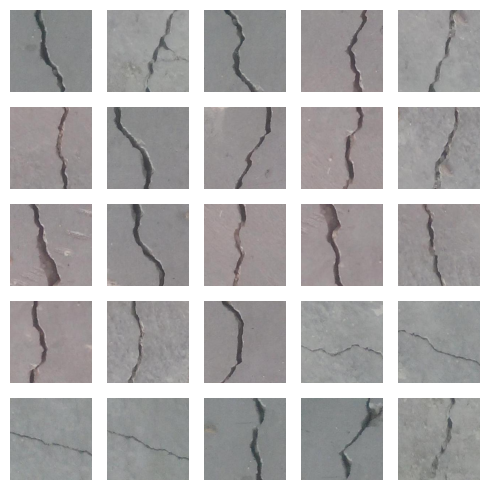

In [41]:
show_data(positive_dir)

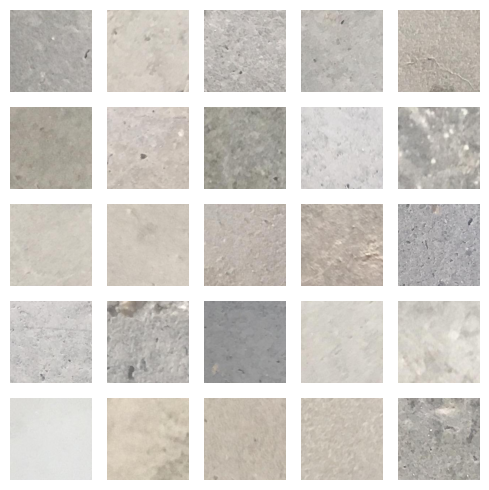

In [42]:
show_data(negative_dir)

Load, Blur, Sobel Filter

In [5]:
data_dir = "D:/CS231.O22/data"
labels = ['Negative', 'Positive']

def sobel_filters(img):
    kernels = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    return cv2.filter2D(img, -1, kernels)

def load_image(data_dir):
    img_data = []
    img_label = []
    
    for label in labels:
        path = os.path.join(data_dir, label)
        y_label = labels.index(label)

        for img_name in tqdm(os.listdir(path)):

            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)

            resized_img = cv2.resize(img, (120, 120)) # Resize ảnh về kích thước 120x120

            blured_img = cv2.GaussianBlur(resized_img, ksize=(9,9), sigmaX=0, sigmaY=0)
            
            sobeled_img = sobel_filters(blured_img)
                
            (_, thresholded_img) = cv2.threshold(sobeled_img, 30, 255, cv2.THRESH_BINARY)

            img_data.append(np.reshape(thresholded_img, -1)) 

            img_label.append(y_label)
            
    return np.array(img_data), np.array(img_label)

In [150]:
img_data, img_label = load_image(data_dir)

100%|██████████| 20000/20000 [01:36<00:00, 207.53it/s]


In [151]:
img_data.shape, img_label.shape

((40000, 14400), (40000,))

Step-by-step visualization of data processing

In [44]:
def data_processing(path):
    fig, axes = plt.subplots(1, 5, figsize=(8, 8)) 

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    axes[0].imshow(img,cmap='gray')
    axes[0].set_title("Gray img", fontsize = 10)
    axes[0].axis('off')  # Ẩn đi trục x và y

    resized_img = cv2.resize(img, (120, 120)) # Resize ảnh về kích thước 120x120
    axes[1].imshow(resized_img, cmap='gray')
    axes[1].set_title("Resized img", fontsize = 10)
    axes[1].axis('off')  

    blured_img = cv2.GaussianBlur(resized_img, ksize=(9,9), sigmaX=0)
    axes[2].imshow(blured_img, cmap='gray')
    axes[2].set_title("Blured img", fontsize = 10)
    axes[2].axis('off')  

    sobeled_img = sobel_filters(blured_img)
    axes[3].imshow(sobeled_img, cmap='gray')
    axes[3].set_title("Sobeled img", fontsize = 10)
    axes[3].axis('off')  

    (_, thresholded_img) = cv2.threshold(sobeled_img, 30, 255, cv2.THRESH_BINARY)
    
    axes[4].imshow(thresholded_img, cmap='gray')
    axes[4].set_title("Thresholded img", fontsize = 10)
    axes[4].axis('off')
    
    fig.tight_layout()
    plt.show()

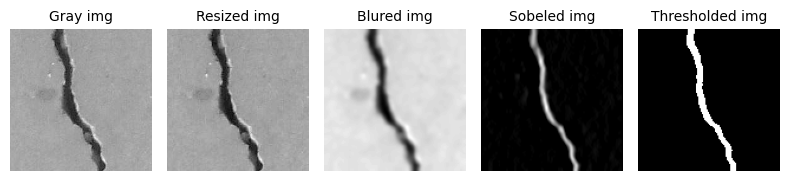

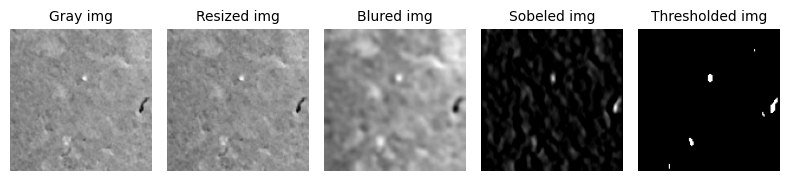

In [46]:
data_processing("D:/CS231.O22/data/Positive/00001.jpg")
data_processing("D:/CS231.O22/data/Negative/00001.jpg")

Blur image with different kernel

In [10]:
def blur_img_with_diff_kernel(path):
    fig, axes = plt.subplots(1, 4, figsize=(8, 8)) 

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (120, 120))
    
    blur_3 = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0, sigmaY=0)
    blur_5 = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=0, sigmaY=0)
    blur_7 = cv2.GaussianBlur(img, ksize=(7,7), sigmaX=0, sigmaY=0)
    blur_9 = cv2.GaussianBlur(img, ksize=(9,9), sigmaX=0, sigmaY=0)

    axes[0].imshow(blur_3,cmap='gray')
    axes[0].set_title("Kernel (3,3)", fontsize = 10)
    axes[0].axis('off')

    axes[1].imshow(blur_5,cmap='gray')
    axes[1].set_title("Kernel (5,5)", fontsize = 10)
    axes[1].axis('off')

    axes[2].imshow(blur_7,cmap='gray')
    axes[2].set_title("Kernel (7,7)", fontsize = 10)
    axes[2].axis('off')

    axes[3].imshow(blur_9,cmap='gray')
    axes[3].set_title("Kernel (9,9)", fontsize = 10)
    axes[3].axis('off')

    fig.tight_layout()
    plt.show()

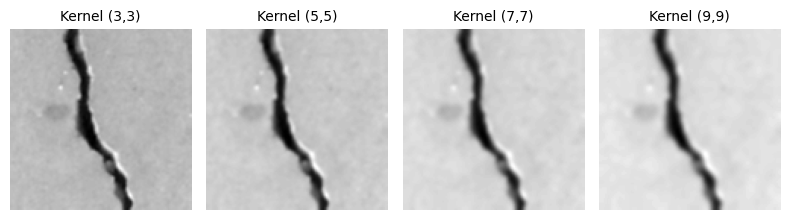

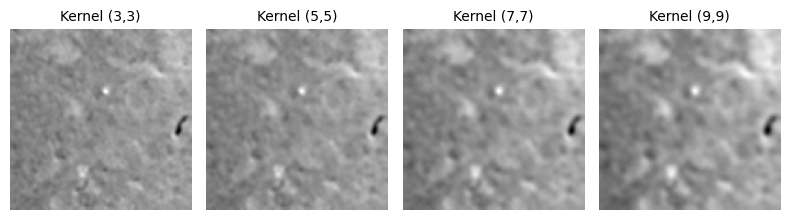

In [11]:
blur_img_with_diff_kernel("D:/CS231.O22/data/Positive/00001.jpg")
blur_img_with_diff_kernel("D:/CS231.O22/data/Negative/00001.jpg")

Scaling Data

In [154]:
min_max_scaler = preprocessing.MinMaxScaler()
img_data = min_max_scaler.fit_transform(img_data)

Save Data To img_data.pkl

In [155]:
# Lưu toàn bộ img_data vào img_data.pkl
with open('img_data.pkl', 'wb') as f:
    pickle.dump(img_data, f)
with open('img_label.pkl', 'wb') as f:
    pickle.dump(img_label, f)

Load Data From img_data.pkl

In [156]:
# Đọc img_data từ tệp tin
with open('img_data.pkl', 'rb') as f:
    img_data = pickle.load(f)
with open('img_label.pkl', 'rb') as f:
    img_label = pickle.load(f)


Shuffle then Split data into Train and Test

In [157]:
img_data_label = np.column_stack((img_data, img_label))

In [158]:
np.random.shuffle(img_data_label) # Trộn các hàng của dữ liệu


In [159]:
img_data = img_data_label[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng
img_label = img_data_label[:, -1]  # Lấy cột cuối cùng


In [160]:
# Chia toàn bộ dữ liệu thành 3 phần: Train, Validation, Test theo tỉ lệ (6,2,2)
X_train, X_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.2, random_state=42)
X_train, X_vali, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [161]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('X_vali.pkl', 'wb') as f:
    pickle.dump(X_vali, f)
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_valid.pkl', 'wb') as f:
    pickle.dump(y_valid, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [5]:
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('X_vali.pkl', 'rb') as f:
    X_vali = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_valid.pkl', 'rb') as f:
    y_valid = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

Define Sigmoid, Loss, Predict, Accuracy

In [2]:
def sigmoid(z): # z = wx + b
    return 1/(1 + np.exp(-z))

def loss(y, a): # a = sigmoid(z)
    return -1 * (y * np.log(a) + (1-y) * np.log(1-a))

def predict(X, w, b):
    p = sigmoid(np.dot(X, w) + b)
    for i in range (0, p.size):
        if p[i] < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    return p

def accuracy(predict, y):
    count = 0
    for i in range(0, predict.size):
        if int(predict[i]) != y[i]:
            count += 1
    return (predict.size - count) / predict.size

Model Implement

In [182]:
w_cache = []
b_cache = []
l_cache = []
def Logistic_Regression(X_train, y_train, learning_rate, epoch):
    # Khởi tạo w, b
    w = np.zeros(X_train.shape[1])
    b = 0.0

    for epoch in range(epoch):
        dw = np.zeros(w.shape)
        db = 0.0
        total_loss = 0.0

        for i in range(X_train.shape[0]):
            # Lấy ra dữ liệu thứ i
            x_i = X_train[i,:]
            y_i = y_train[i]

            # Trước khi tính Loss
            z_i = w.dot(x_i) + b
            a_i = sigmoid(z_i)

            # Loss của 1 điểm dữ liệu
            loss_i = loss(y_i, a_i)

            # Đạo hàm
            dw_i = x_i * (a_i - y_i) # dL / dw_i
            db_i = a_i - y_i  # dL / db

            # Tổng đạo hàm, Loss
            dw += dw_i
            db += db_i
            total_loss += loss_i

        # Tính trung bình dw, db, total_loss
        dw = (1.0/X_train.shape[0]) * dw
        db = (1.0/X_train.shape[0]) * db
        total_loss = (1.0/X_train.shape[0]) * total_loss
        print(f'Epoch {epoch+1}, Loss = {total_loss:.2f}')

        # Gradient Descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Dữ liệu dùng để vẽ 
        w_cache.append(w.copy())
        b_cache.append(b)
        l_cache.append(total_loss)

    print('\nAfter training, we obtained')
    print('Weights w = ', w)
    print(f'Bias b = {b:.2f}')
    return w, b

In [183]:
w, b = Logistic_Regression(X_train, y_train, learning_rate = 0.1, epoch = 700)

Epoch 1, Loss = 0.69
Epoch 2, Loss = 0.52
Epoch 3, Loss = 0.50
Epoch 4, Loss = 0.49
Epoch 5, Loss = 0.48
Epoch 6, Loss = 0.48
Epoch 7, Loss = 0.47
Epoch 8, Loss = 0.46
Epoch 9, Loss = 0.46
Epoch 10, Loss = 0.45
Epoch 11, Loss = 0.45
Epoch 12, Loss = 0.44
Epoch 13, Loss = 0.44
Epoch 14, Loss = 0.43
Epoch 15, Loss = 0.43
Epoch 16, Loss = 0.42
Epoch 17, Loss = 0.42
Epoch 18, Loss = 0.41
Epoch 19, Loss = 0.41
Epoch 20, Loss = 0.41
Epoch 21, Loss = 0.40
Epoch 22, Loss = 0.40
Epoch 23, Loss = 0.39
Epoch 24, Loss = 0.39
Epoch 25, Loss = 0.39
Epoch 26, Loss = 0.38
Epoch 27, Loss = 0.38
Epoch 28, Loss = 0.38
Epoch 29, Loss = 0.37
Epoch 30, Loss = 0.37
Epoch 31, Loss = 0.37
Epoch 32, Loss = 0.36
Epoch 33, Loss = 0.36
Epoch 34, Loss = 0.36
Epoch 35, Loss = 0.36
Epoch 36, Loss = 0.35
Epoch 37, Loss = 0.35
Epoch 38, Loss = 0.35
Epoch 39, Loss = 0.34
Epoch 40, Loss = 0.34
Epoch 41, Loss = 0.34
Epoch 42, Loss = 0.34
Epoch 43, Loss = 0.33
Epoch 44, Loss = 0.33
Epoch 45, Loss = 0.33
Epoch 46, Loss = 0.

In [184]:
with open('w_0,15_800.pkl', 'wb') as f:
    pickle.dump(w, f)
with open('b_0,15_800.pkl', 'wb') as f:
    pickle.dump(b, f)

In [8]:
with open('w_0,15_800.pkl', 'rb') as f:
    w = pickle.load(f)
with open('b_0,15_800.pkl', 'rb') as f:
    b = pickle.load(f)    


Visualize Loss

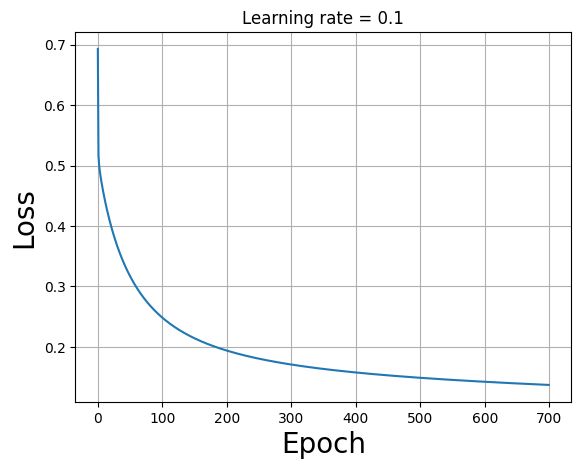

In [185]:
def plot_loss():
    plt.grid()
    plt.plot(l_cache)
    plt.title("Learning rate = 0.1")
    plt.ylabel('Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
plot_loss()


Evaluate Model

In [6]:
p_vali = predict(X_vali, w, b)
p_test = predict(X_test, w , b)
accur_vali = accuracy(p_vali, y_valid)
accur_test = accuracy(p_test, y_test)
print(f'Accuracy on Validation set = {accur_vali:.4f}')
print(f'Accuracy on Test set = {accur_test:.4f}')

Accuracy on Validation set = 0.9414
Accuracy on Test set = 0.9397


Demo

In [6]:
def Demo(data_dir):
    img_data_test, img_label_test = load_image(data_dir)
    min_max_scaler = preprocessing.MinMaxScaler()
    img_data_test = min_max_scaler.fit_transform(img_data_test)
    fig, axes = plt.subplots(1, img_data_test.shape[0], figsize=(20, 20))
    p_data_test = predict(img_data_test, w, b)
    accur_data_test = accuracy(p_data_test, img_label_test)
    i = 0
    for label in labels:
        path = os.path.join(data_dir, label)
        y_label = labels.index(label)
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(img,cmap='gray')
            axes[i].set_title(f"Predict: {int(p_data_test[i])}\n Label: {y_label}", fontsize = 10)
            axes[i].axis('off')
            i += 1
    fig.tight_layout()
    plt.show()
    print(f'Accuracy = {accur_data_test:.4f}') 


100%|██████████| 10/10 [00:00<00:00, 303.06it/s]


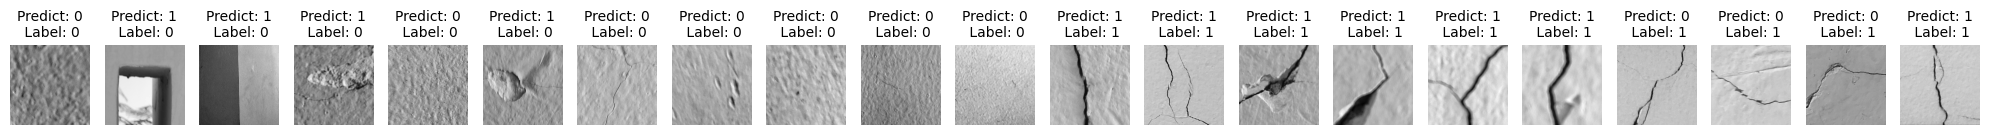

Accuracy = 0.6667


In [12]:
Demo("D:/CS231.O22/test_data")